In [2]:
from __future__ import division
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Goals:
- categorize categories into <`1h median and >1h
- find pct of \<1h for ea grp
- make visual dist for ea type

In [3]:
df = pd.read_pickle('../data/data_2016_w_descs_and_census.pkl')

In [8]:
df.head(2).T

,13,14
CASE_ENQUIRY_ID,101001867997,101001873009
OPEN_DT,2016-07-26 08:43:35,2016-08-01 04:07:00
TARGET_DT,2016-07-27 08:43:35,NaT
CLOSED_DT,2016-07-26 10:58:29,NaT
OnTime_Status,ONTIME,ONTIME
CASE_STATUS,Closed,Open
CLOSURE_REASON,Case Closed. Closed date : 2016-07-26 10:58:29...,NaN
CASE_TITLE,Parking Enforcement,Animal Generic Request
SUBJECT,Transportation - Traffic Division,Animal Control
REASON,Enforcement & Abandoned Vehicles,Animal Issues


In [24]:
df.head(1).T

,13
CASE_ENQUIRY_ID,101001867997
OPEN_DT,2016-07-26 08:43:35
TARGET_DT,2016-07-27 08:43:35
CLOSED_DT,2016-07-26 10:58:29
OnTime_Status,ONTIME
CASE_STATUS,Closed
CLOSURE_REASON,Case Closed. Closed date : 2016-07-26 10:58:29...
CASE_TITLE,Parking Enforcement
SUBJECT,Transportation - Traffic Division
REASON,Enforcement & Abandoned Vehicles


In [9]:
df.shape

(182778, 156)

In [4]:
df['COMPLETION_TIME'] = (df.CLOSED_DT - df.OPEN_DT).apply(lambda x: x / pd.np.timedelta64(1, 'h'))

## categorize categories into <`1h median and \>1h

In [5]:
# http://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
f = {'COMPLETION_TIME':['median','count']}
df_type_by_completion_time = df[['COMPLETION_TIME', 'TYPE']].dropna(subset=['COMPLETION_TIME']).groupby('TYPE').agg(f)

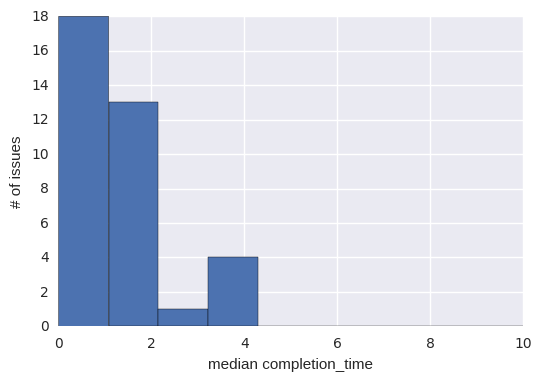

In [55]:
ax = df_type_by_completion_time[('COMPLETION_TIME', 'median')].hist(bins=2000)
ax.set_xlabel('median completion_time')
ax.set_ylabel('# of issues')
ax.set_xlim(0, 10);

From the above graph, I will set `<1h` to be w `median < 2h` and `>1h` to be `median > 2h`.

In [6]:
types_less_than_1h = list(df_type_by_completion_time[df_type_by_completion_time[('COMPLETION_TIME', 'median')] < 2].index)
types_more_than_1h = list(df_type_by_completion_time[df_type_by_completion_time[('COMPLETION_TIME', 'median')] >= 2].index)

In [23]:
for i in types_more_than_1h:
    print '[Type] = "{}" or'.format(i)

[Type] = "Abandoned Bicycle" or
[Type] = "Abandoned Building" or
[Type] = "Abandoned Vehicles" or
[Type] = "Alert Boston" or
[Type] = "Animal Found" or
[Type] = "Animal Generic Request" or
[Type] = "Animal Lost" or
[Type] = "Animal Noise Disturbances" or
[Type] = "BWSC General Request" or
[Type] = "BWSC Pothole" or
[Type] = "Bed Bugs" or
[Type] = "Bicycle Issues" or
[Type] = "Big Buildings Online Request" or
[Type] = "Billing Complaint" or
[Type] = "Breathe Easy" or
[Type] = "Building Inspection Request" or
[Type] = "Carbon Monoxide" or
[Type] = "Catchbasin" or
[Type] = "Cemetery Maintenance Request" or
[Type] = "Chronic Dampness/Mold" or
[Type] = "Contractor Complaints" or
[Type] = "Contractors Complaint" or
[Type] = "Cross Metering - Sub-Metering" or
[Type] = "Dumpster & Loading Noise Disturbances" or
[Type] = "Egress" or
[Type] = "Electrical" or
[Type] = "Equipment Repair" or
[Type] = "Exceeding Terms of Permit" or
[Type] = "Fire Hydrant" or
[Type] = "Fire in Food Establishment" or


In [22]:
df.iloc[:1, :32].T

,13
CASE_ENQUIRY_ID,101001867997
OPEN_DT,2016-07-26 08:43:35
TARGET_DT,2016-07-27 08:43:35
CLOSED_DT,2016-07-26 10:58:29
OnTime_Status,ONTIME
CASE_STATUS,Closed
CLOSURE_REASON,Case Closed. Closed date : 2016-07-26 10:58:29...
CASE_TITLE,Parking Enforcement
SUBJECT,Transportation - Traffic Division
REASON,Enforcement & Abandoned Vehicles


In [13]:
print len(types_less_than_1h), len(types_more_than_1h)

30 143


In [14]:
df['median_less_than_1h'] = df.TYPE.isin(types_less_than_1h)

## find pct of \<1h for ea grp

In [15]:
df[df.median_less_than_1h == True]['<1h_completion'].sum() / len(df[df.median_less_than_1h == True])

0.41416322062758454

In [16]:
df[df.median_less_than_1h == False]['<1h_completion'].sum() / len(df[df.median_less_than_1h == True])

0.1818900510824617

The second finding is more relevant. 18% of the issues [whose types have a median completion time of more than 1h] are completed in less than an hour. That's pretty high.

## Count in ea of these 1h+ types

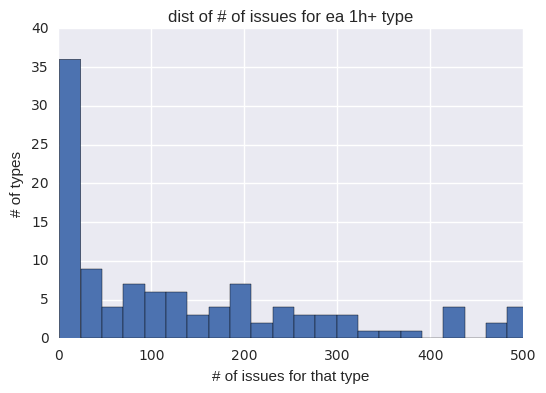

In [106]:
ax = df[df.median_less_than_1h == False][['TYPE', 'CASE_ENQUIRY_ID']]. \
    groupby('TYPE').count()['CASE_ENQUIRY_ID'].hist(bins=500)
ax.set_xlabel('# of issues for that type')
ax.set_ylabel('# of types')
ax.set_title('dist of # of issues for ea 1h+ type')
ax.set_xlim(0, 500);

I will eyeball some cutoff at 20 issues/type. I don't care about the types w <20 issues/type.

In [17]:
aa = df[df.median_less_than_1h == False][['TYPE', 'CASE_ENQUIRY_ID']].groupby('TYPE').count()
types_more_than_20_issues = list(aa[aa.CASE_ENQUIRY_ID > 20].index)

## Visual dist of completion times for these 1h+ types

In [18]:
def pct_less_than_1h(lst):
    num_less_than_1h = (lst <= 1).sum()
    return num_less_than_1h / len(lst)

In [128]:
df[df.median_less_than_1h == False][df.TYPE.isin(types_more_than_20_issues)][['TYPE', 'COMPLETION_TIME']] \
    .groupby('TYPE').agg(pct_less_than_1h).sort_values('COMPLETION_TIME', ascending=False).head(30)

/media/aok1425/1f5fa7c1-6532-4a01-8076-91f01ca10cae/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,COMPLETION_TIME
TYPE,
Unshoveled Sidewalk,0.373669
Alert Boston,0.320000
Needle Pickup,0.312153
Student Move-in Issues,0.307692
Illegal Posting of Signs,0.296970
Litter Basket Maintenance,0.282051
Tree Emergencies,0.269537
Carbon Monoxide,0.269231
Missed Trash/Recycling/Yard Waste/Bulk Item,0.262207


37% of Unshoveled Sidewalk issues are completed in <1h.

Now I should look at the types. Are there any I would suspect should take >1h?

pothole reapir, lead, pigeon infestation. Let's manually examine each of these. (Then I will stop!)

In [1]:
CHOSEN_TYPE = 'Major System Failure'

with pd.option_context("display.max_colwidth", 200):
    display(df[df['<1h_completion'] == True][df.OPEN_DT > '2016-01-01'][df.OPEN_DT < '2017-06-01'][df.TYPE == CHOSEN_TYPE][['Source', 'TYPE', '<1h_completion', 'CASE_STATUS', 'description', 'CLOSURE_REASON']].head(30))

NameError: name 'display' is not defined

I learned some new keywords that I may use to drop rows, like "invalid" and "mistake".

I also "conclude" that I haven't seen instances of stopping issues early artificially.

## Alternative effort to detect types with abnormally low completion time

/media/aok1425/1f5fa7c1-6532-4a01-8076-91f01ca10cae/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


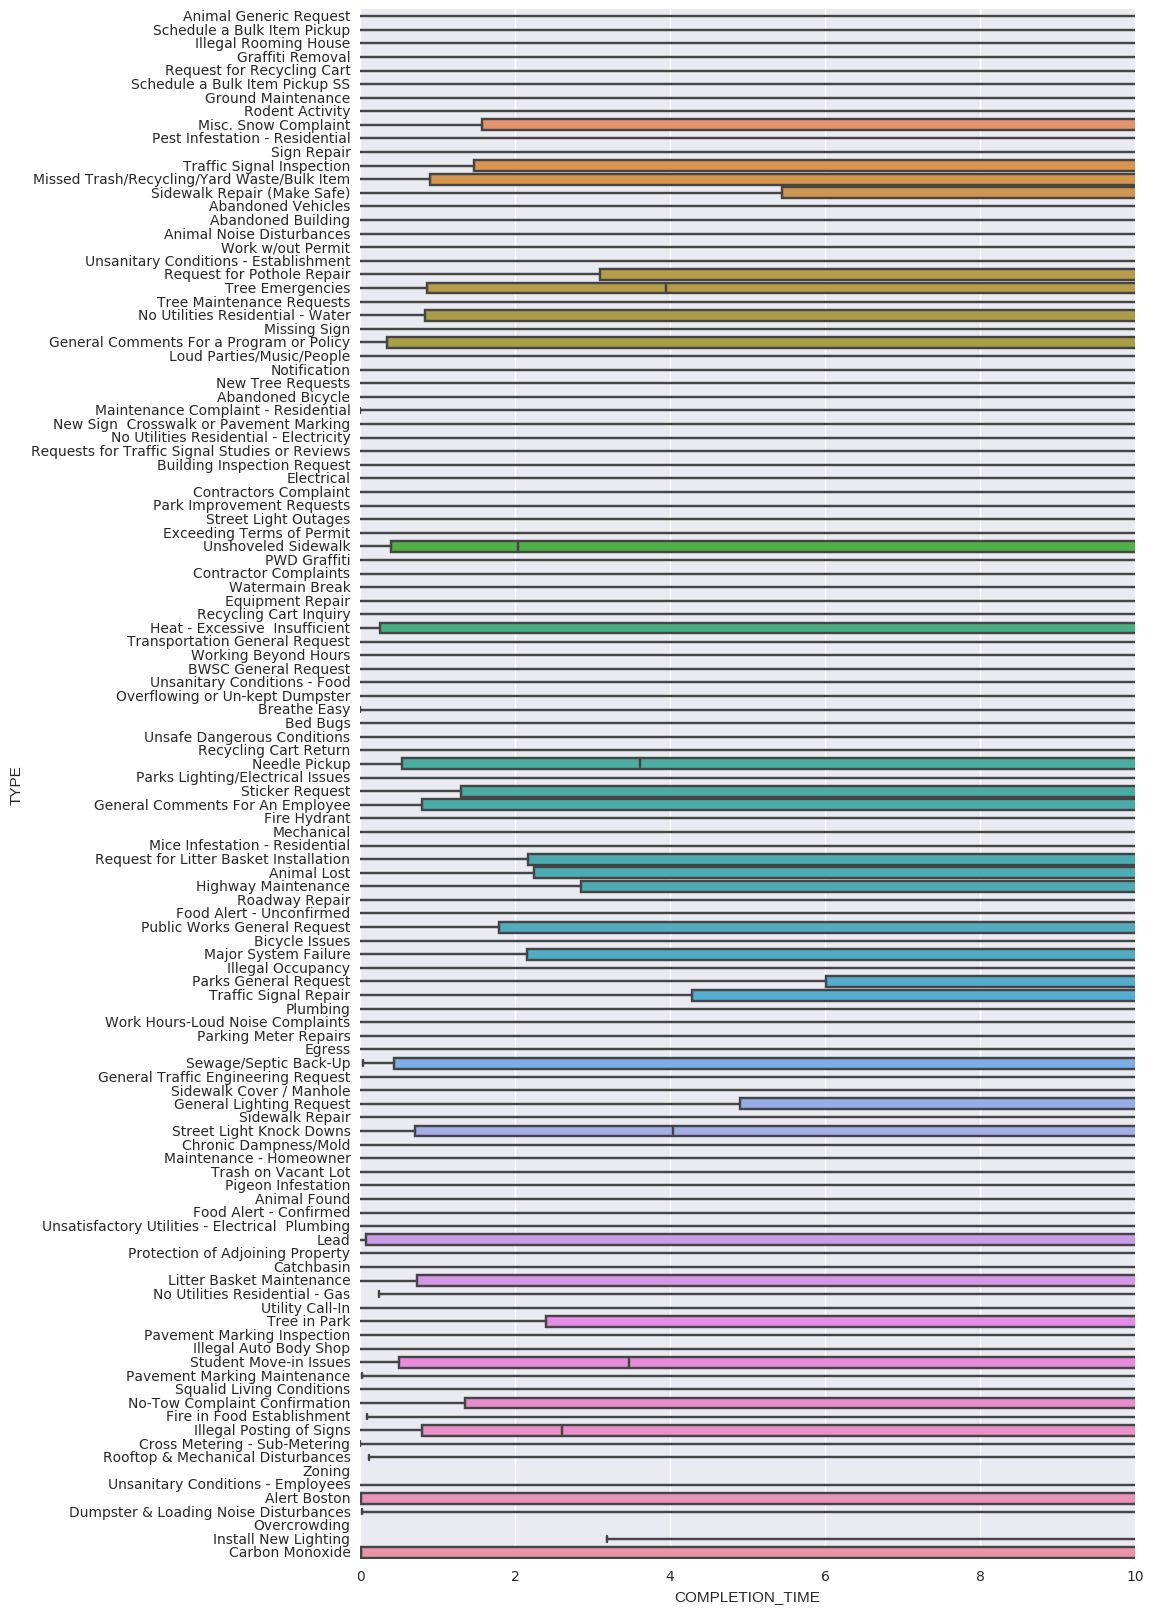

In [111]:
fig = plt.figure(figsize=(10,20))     # <-- figsize!
ax = fig.add_subplot(111)    # #rows, #cols, plotnumber
ax.set_xlim(0, 10)
sns.boxplot(y="TYPE", x="COMPLETION_TIME", 
            data=df[df.median_less_than_1h == False][df.TYPE.isin(types_more_than_20_issues)], orient='h', ax=ax);

## Another section

In [21]:
df[['COMPLETION_TIME', 'TYPE']].dropna(subset=['COMPLETION_TIME']).groupby('TYPE').median().sort_values('COMPLETION_TIME')

,COMPLETION_TIME
TYPE,
OCR Front Desk Interactions,0.005833
Scale Not Visible,0.007083
Product Short Measure,0.009167
Short Measure - Gas,0.011528
Call Log,0.016667
Aircraft Noise Disturbance,0.017222
City/State Snow Issues,0.020278
No Price on Gas/Wrong Price,0.021528
Student Overcrowding,0.023333


In [ ]:
df['is_description_null'] = df.description.isnull()

In [ ]:
df[df.OPEN_DT > '2016-01-01'][['is_description_null', 'Source', 'CASE_STATUS']].groupby(['Source', 'is_description_null']).count().unstack()